# IS53051A Machine Learning Assignment
### Jake Tyler & Sonny Holland

https://learn.gold.ac.uk/mod/assign/view.php?id=1246475 <- Assignment Link

### 0. Importing Libraries

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk

### 1. Loading and inspecting the data.

#### 1.1 Inspecting the data

In [81]:
dataset = pd.read_csv('datcw_na.csv')
dataset.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.0,0.0,15.55
1,C1,1.19,622.55,323.40,109.15,7.70,3.00,0.0,0.0,15.55
2,C1,0.88,463.05,291.06,99.23,5.67,4.40,0.0,0.0,15.55
3,C2,0.79,509.36,291.06,121.28,6.30,4.05,0.0,0.0,15.55
4,C1,0.89,507.15,385.39,121.28,7.70,2.00,0.0,0.0,20.84


In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      768 non-null    object 
 1   X1      768 non-null    float64
 2   X2      768 non-null    float64
 3   X3      728 non-null    float64
 4   X4      768 non-null    float64
 5   X5      768 non-null    float64
 6   X6      768 non-null    float64
 7   X7      768 non-null    float64
 8   X8      768 non-null    float64
 9   Y       768 non-null    float64
dtypes: float64(9), object(1)
memory usage: 60.1+ KB


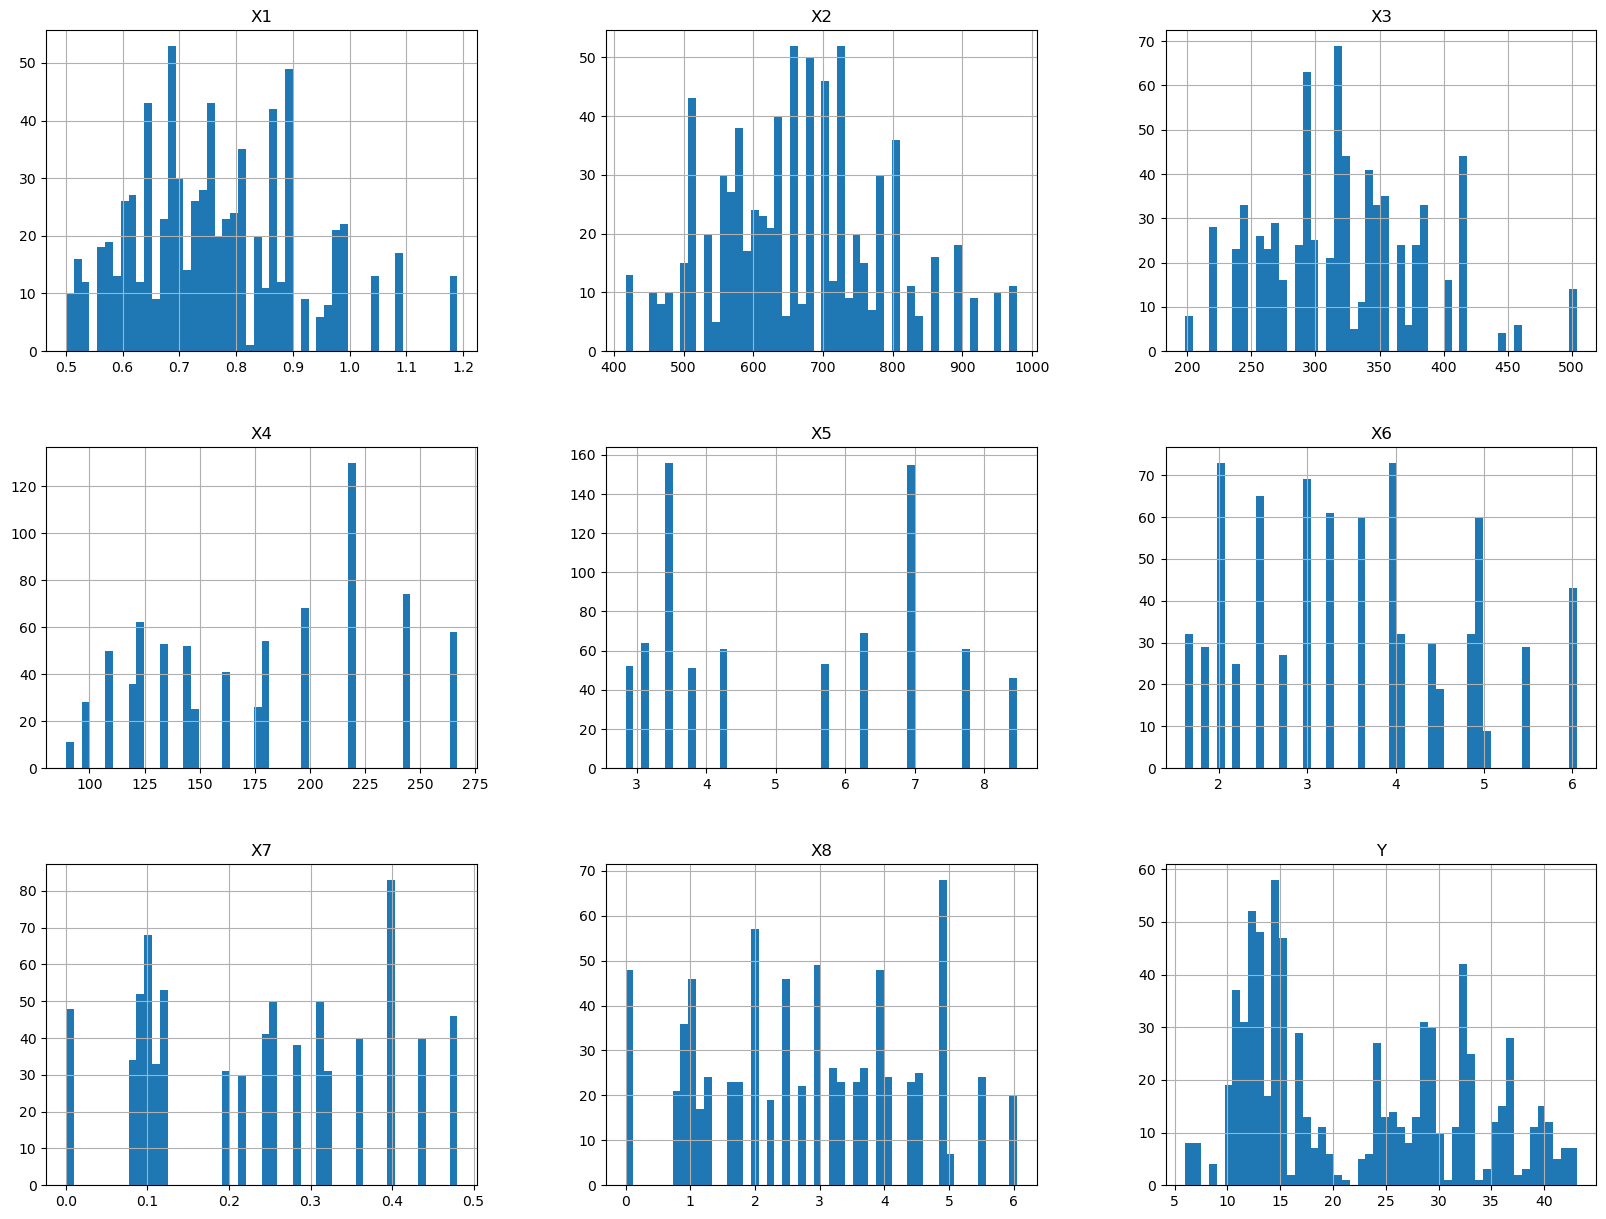

In [75]:
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))
plt.show()

#### Inspecting missing, or non numerical data

TO BE REWRITTEN: Note, column 'X0' does not contain numerical data, but rather a unique identifier for each row. This column could be dropped from the dataset, or if a strong correlation warrants it, the column could be encoded and included in training.

In [76]:
dataset["X0"].unique()

array(['C3', 'C1', 'C2'], dtype=object)

TO BE REWRITTEN: Luckily, only the column 'X3' has missing values from the dataset. This column could either be dropped, or the missing values could be replaced with the mean of the column. Again, only if a strong correlation warrants it, otherwise calculating the mean could introduce innacurate trends within the dataset.

In [77]:
dataset.isna().sum()

X0     0
X1     0
X2     0
X3    40
X4     0
X5     0
X6     0
X7     0
X8     0
Y      0
dtype: int64

In [78]:
dataset["X3"].size

768

If the column is of a length of 768 entries, it would be reasonable to pad the missing values with the calculate mean of the column. As there are only 3 categories within this subset of the dataframe, one hot encoding would be an appropriate method of encoding the data - as the contrary, *One-Hot Encoding* is typically used for encoding data with a larger number of categories, and a higher rank data structure.

In [82]:
x3_mean = dataset['X3'].mean()
dataset['X3'].fillna(x3_mean, inplace=True)

In [85]:
dataset["X0"]
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
X0_1hot = encoder.fit_transform(dataset["X0"].values.reshape(-1,1))
dataset = dataset.drop('X0', axis=1)
dataset = pd.concat([dataset, pd.DataFrame(X0_1hot)], axis=1)

In [86]:
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,Y,0,1,2
0,1.19,622.55,321.102527,89.31,7.00,1.98,0.00,0.00,15.55,0.0,0.0,1.0
1,1.19,622.55,323.400000,109.15,7.70,3.00,0.00,0.00,15.55,1.0,0.0,0.0
2,0.88,463.05,291.060000,99.23,5.67,4.40,0.00,0.00,15.55,1.0,0.0,0.0
3,0.79,509.36,291.060000,121.28,6.30,4.05,0.00,0.00,15.55,0.0,1.0,0.0
4,0.89,507.15,385.390000,121.28,7.70,2.00,0.00,0.00,20.84,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.52,948.64,277.830000,218.30,4.24,4.95,0.48,4.05,17.88,0.0,0.0,1.0
764,0.50,727.65,321.102527,266.80,3.47,1.98,0.44,5.00,16.54,0.0,1.0,0.0
765,0.68,889.35,404.250000,178.60,3.47,2.43,0.40,4.95,16.44,1.0,0.0,0.0
766,0.50,654.88,363.820000,218.30,3.15,3.96,0.36,4.50,16.48,0.0,0.0,1.0
